<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/60_40_Equities_and_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

15:11:11 Starting...
15:11:12 Installing yfinance into Google notebook...
15:11:21 Installing arch into Google notebook...
15:11:28 Initialized.


[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-2934492926.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  data.index=pd.DatetimeIndex(data.index).to_period('B')


Price           Close                   High                    Low  \
Ticker            BND         SPY        BND         SPY        BND   
Date                                                                  
2007-04-11  41.654312  101.659698  41.793086  102.252628  41.648760   
2007-04-12  41.648808  102.111465  41.676564  102.294988  41.609951   
2007-04-13  41.582153  102.577370  41.670966  102.577370  41.548845   
2007-04-16  41.621017  103.551430  41.626565  103.664372  41.598813   
2007-04-17  41.726486  103.826729  41.726486  104.045547  41.687630   
...               ...         ...        ...         ...        ...   
2026-01-28  74.004936  695.419983  74.014905  697.840027  73.905268   
2026-01-29  74.014900  694.039978  74.074700  697.059998  73.895294   
2026-01-30  73.985001  691.969971  74.054769  694.210022  73.925193   
2026-02-02  73.910004  695.409973  74.040001  696.929993  73.889999   
2026-02-03  73.930000  689.530029  73.940002  696.960022  73.839996   

Price                        Open                Return                Volume  \
Ticker             SPY        BND         SPY       BND       SPY         BND   
Date                                                                            
2007-04-11  101.320872  41.720925  102.224398 -0.265862 -0.408032     87700.0   
2007-04-12  101.179709  41.665460  101.462064 -0.013215  0.444391     78100.0   
2007-04-13  101.899728  41.654314  102.280894 -0.160039  0.456270     18000.0   
2007-04-16  102.930270  41.626565  102.937324  0.093463  0.949586     52700.0   
2007-04-17  103.516143  41.720938  103.742028  0.253403  0.265857     25600.0   
...                ...        ...         ...       ...       ...         ...   
2026-01-28  693.940002  73.994967  697.049988 -0.040386 -0.010066   9328300.0   
2026-01-29  684.830017  73.905263  696.390015  0.013464 -0.198442  16397300.0   
2026-01-30  687.119995  74.004931  691.789978 -0.040397 -0.298255   8977500.0   
2026-02-02  689.419983  74.029999  689.580017 -0.101368  0.497132   8636400.0   
2026-02-03  684.030029  73.860001  696.210022  0.027055 -0.845536  11286300.0   

Price                 Weight         Return  Cumulative                         
Ticker            SPY    BND  SPY Portfolio         SPY        BND   Portfolio  
Date                                                                            
2007-04-11  106365700    0.4  0.6 -0.351164   -0.408032  -0.265862   -0.351164  
2007-04-12  115534400    0.4  0.6  0.261349    0.034546  -0.279042   -0.090733  
2007-04-13   84287000    0.4  0.6  0.209747    0.490974  -0.438634    0.118823  
2007-04-16   83064600    0.4  0.6  0.607137    1.445222  -0.345580    0.726681  
2007-04-17  108424100    0.4  0.6  0.260875    1.714921  -0.093054    0.989453  
...               ...    ...  ...       ...         ...        ...         ...  
2026-01-28   61172200    0.4  0.6 -0.022194  581.275328  77.192184  337.263319  
2026-01-29   97486200    0.4  0.6 -0.113680  579.923392  77.216041  336.766239  
2026-01-30  101835100    0.4  0.6 -0.195112  577.895488  77.144451  335.914058  
2026-02-02   79286500    0.4  0.6  0.257732  581.265522  76.964884  337.037548  
2026-02-03  107782300    0.4  0.6 -0.496500  575.505175  77.012762  334.867658  

[4735 rows x 18 columns]

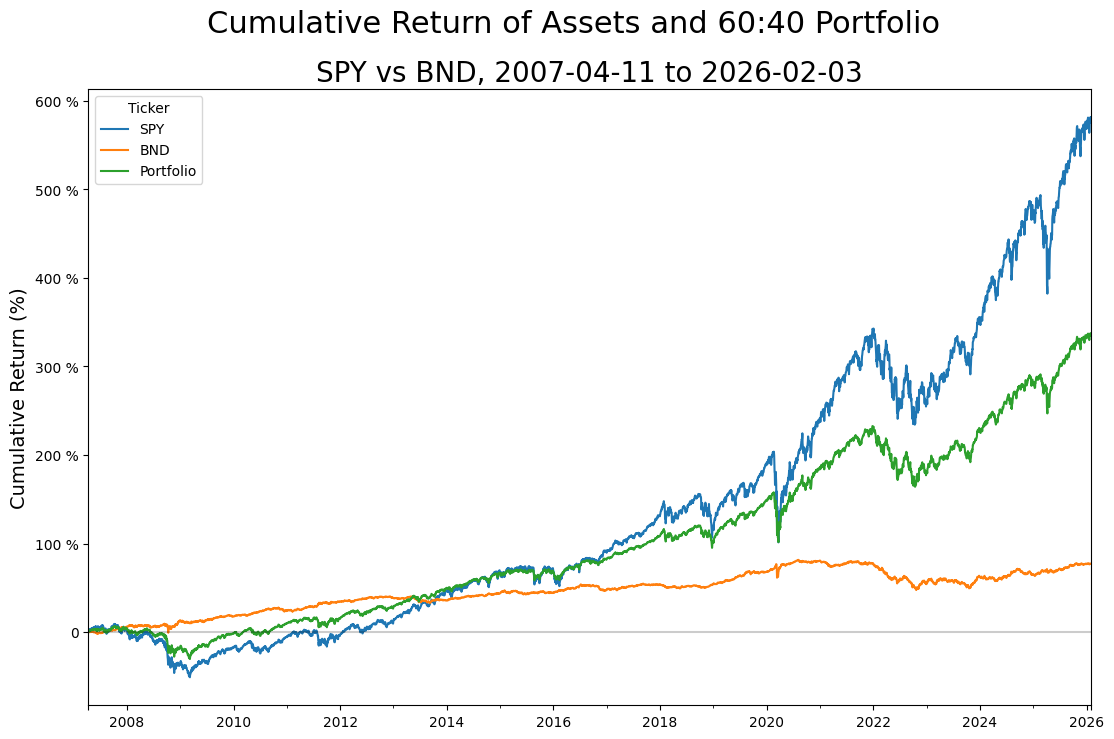

In [9]:
data=download(tickers:=[market:='SPY',alternative:='BND'],"1990-01-01",today("%Y-%m-%d"),auto_adjust=True)
data.index=pd.DatetimeIndex(data.index).to_period('B')
#data=data.resample('M').last()

for ticker in tickers:
    data[('Return',ticker)]=data[('Close',ticker)].pct_change()*hundred
    data[('Weight',ticker)]=0.6 if ticker==market else 0.4

data.dropna(inplace=True)
data.sort_index(axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

for ticker in tickers+['Portfolio']:
    data[('Cumulative',ticker)]=(data[('Return',ticker)]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and 60:40 Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

display(data)

In [3]:
from warnings import filterwarnings ; filterwarnings('ignore',category=pd.errors.PerformanceWarning)

report=pd.DataFrame({'Weight':np.arange(zero,one+(delta:=0.05),delta)}).set_index("Weight")

if data.index.dtype==pd.PeriodDtype('W'):
    annualize=52e0

elif data.index.dtype==pd.PeriodDtype('M'):
    annualize=12e0

elif data.index.dtype==pd.PeriodDtype('Q'):
    annualize=4e0

elif data.index.dtype==pd.PeriodDtype('Y'):
    annualize=1e0

else:
    annualize=252e0

for weight in tqdm(report.index):
    report.loc[weight,market]=weight
    report.loc[weight,alternative]=one-weight

    for ticker in tickers:
        data[('Weight',ticker)]=report.loc[weight,ticker]

    data.drop(('Return','Portfolio'),axis=1,inplace=True)
    data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

    report.loc[weight,'Sample']=(r:=data[('Return','Portfolio')]).count()
    report.loc[weight,'Mean']=(m:=r.mean())
    report.loc[weight,'Std.Dev.']=(s:=r.std())
    report.loc[weight,'Std.Err.']=r.sem()
    report.loc[weight,'Kurtosis']=r.kurt()+three

report['Sharpe']=report['Mean']/report['Std.Dev.']*annualize**half
report['Sharpe S.E.']=((annualize/report['Sample'])*(one+(report['Kurtosis']-one)/four*report['Sharpe']**two))**half

display(report)

  0%|          | 0/21 [00:00<?, ?it/s]

,SPY,BND,Sample,Mean,Std.Dev.,Std.Err.,Kurtosis,Sharpe,Sharpe S.E.
Weight,,,,,,,,,
0.00,0.00,1.00,4735.0,0.012603,0.329052,0.004782,36.267069,0.607999,0.476109
0.05,0.05,0.95,4735.0,0.014380,0.318207,0.004624,49.312906,0.717370,0.619697
0.10,0.10,0.90,4735.0,0.016157,0.320314,0.004655,58.809598,0.800717,0.739169
0.15,0.15,0.85,4735.0,0.017934,0.335128,0.004870,61.160027,0.849495,0.794262
0.20,0.20,0.80,4735.0,0.019711,0.361088,0.005248,57.303230,0.866541,0.784687
0.25,0.25,0.75,4735.0,0.021488,0.396010,0.005755,50.597696,0.861359,0.736771
0.30,0.30,0.70,4735.0,0.023265,0.437752,0.006362,43.706225,0.843663,0.676503
0.35,0.35,0.65,4735.0,0.025042,0.484557,0.007042,37.808461,0.820387,0.618736
0.40,0.40,0.60,4735.0,0.026819,0.535096,0.007776,33.138017,0.795619,0.569119


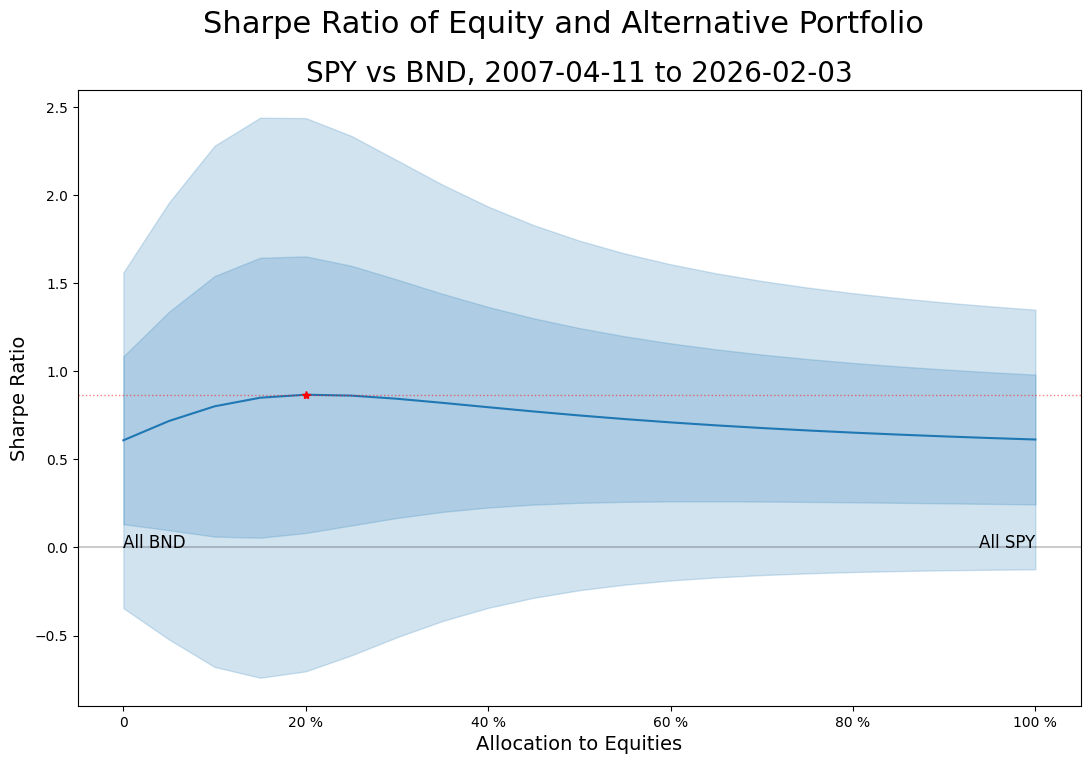

In [4]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index)*hundred,y:=report.loc[x,'Sharpe'])
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[y.argmax()]*hundred,y.max(),'r*')
plot.axhline(y.max(),color='red',linestyle=':',linewidth=1,alpha=0.5)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

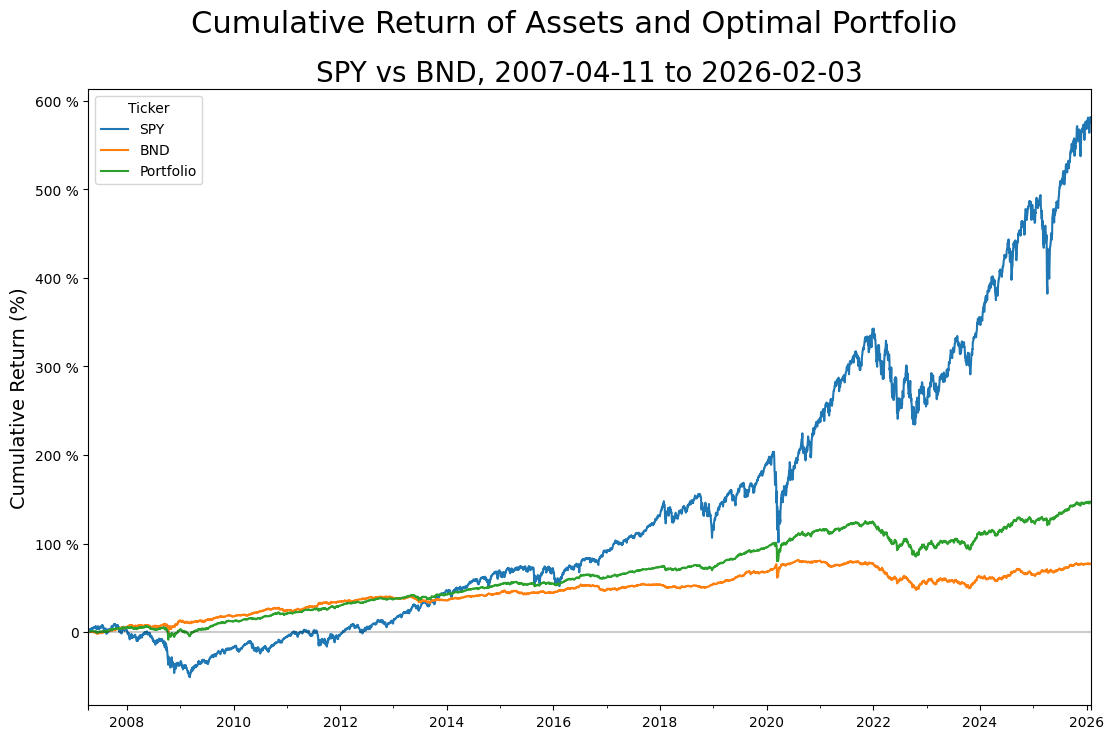

In [7]:
weight=x[y.argmax()]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

In [8]:
data

Price           Close                   High                    Low  \
Ticker            BND         SPY        BND         SPY        BND   
Date                                                                  
2007-04-11  41.654312  101.659698  41.793086  102.252628  41.648760   
2007-04-12  41.648808  102.111465  41.676564  102.294988  41.609951   
2007-04-13  41.582153  102.577370  41.670966  102.577370  41.548845   
2007-04-16  41.621017  103.551430  41.626565  103.664372  41.598813   
2007-04-17  41.726486  103.826729  41.726486  104.045547  41.687630   
...               ...         ...        ...         ...        ...   
2026-01-28  74.004936  695.419983  74.014905  697.840027  73.905268   
2026-01-29  74.014900  694.039978  74.074700  697.059998  73.895294   
2026-01-30  73.985001  691.969971  74.054769  694.210022  73.925193   
2026-02-02  73.910004  695.409973  74.040001  696.929993  73.889999   
2026-02-03  73.930000  689.530029  73.940002  696.960022  73.839996   

Price                        Open                Return                Volume  \
Ticker             SPY        BND         SPY       BND       SPY         BND   
Date                                                                            
2007-04-11  101.320872  41.720925  102.224398 -0.265862 -0.408032     87700.0   
2007-04-12  101.179709  41.665460  101.462064 -0.013215  0.444391     78100.0   
2007-04-13  101.899728  41.654314  102.280894 -0.160039  0.456270     18000.0   
2007-04-16  102.930270  41.626565  102.937324  0.093463  0.949586     52700.0   
2007-04-17  103.516143  41.720938  103.742028  0.253403  0.265857     25600.0   
...                ...        ...         ...       ...       ...         ...   
2026-01-28  693.940002  73.994967  697.049988 -0.040386 -0.010066   9328300.0   
2026-01-29  684.830017  73.905263  696.390015  0.013464 -0.198442  16397300.0   
2026-01-30  687.119995  74.004931  691.789978 -0.040397 -0.298255   8977500.0   
2026-02-02  689.419983  74.029999  689.580017 -0.101368  0.497132   8636400.0   
2026-02-03  684.030029  73.860001  696.210022  0.027055 -0.845536  11286300.0   

Price                 Weight       Cumulative                           Return  
Ticker            SPY    BND  SPY         SPY        BND   Portfolio Portfolio  
Date                                                                            
2007-04-11  106365700    0.8  0.2   -0.408032  -0.265862   -0.294296 -0.294296  
2007-04-12  115534400    0.8  0.2    0.034546  -0.279042   -0.216220  0.078306  
2007-04-13   84287000    0.8  0.2    0.490974  -0.438634   -0.252918 -0.036777  
2007-04-16   83064600    0.8  0.2    1.445222  -0.345580    0.011101  0.264688  
2007-04-17  108424100    0.8  0.2    1.714921  -0.093054    0.267023  0.255894  
...               ...    ...  ...         ...        ...         ...       ...  
2026-01-28   61172200    0.8  0.2  581.275328  77.192184  147.155645 -0.034322  
2026-01-29   97486200    0.8  0.2  579.923392  77.216041  147.084174 -0.028917  
2026-01-30  101835100    0.8  0.2  577.895488  77.144451  146.856935 -0.091968  
2026-02-02   79286500    0.8  0.2  581.265522  76.964884  146.902189  0.018332  
2026-02-03  107782300    0.8  0.2  575.505175  77.012762  146.538100 -0.147463  

[4735 rows x 18 columns]